# 檢視 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [教學目標]
我們已經學過統計值與直方圖, 試著用這些工具尋找與觀察可能的離群值

# [範例重點]
- 使用統計值與直方圖, 觀察離群值 (In[3], Out[3], In[4], Out[4])
- 將疑似離群值的資料移除後, 看看剩餘的資料是否正常 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [28]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 開始檢視不同欄位是否有異常值

In [4]:
# DAYS_BIRTH: 客戶申請貸款時的年齡
(app_train['DAYS_BIRTH'] / (-365)).describe()  # 原始數據應該是出生日期減當天，所以除以-365

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [5]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [7]:
app_train['DAYS_EMPLOYED'] / (-365)

0            1.745205
1            3.254795
2            0.616438
3            8.326027
4            8.323288
             ...     
307506       0.646575
307507   -1000.665753
307508      21.701370
307509      13.112329
307510       3.457534
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

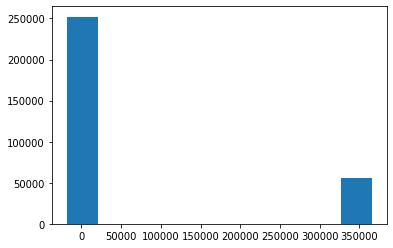

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [8]:
# DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間
(app_train['DAYS_EMPLOYED'] / 365).describe()
plt.hist(app_train['DAYS_EMPLOYED'])
plt.show()
app_train['DAYS_EMPLOYED'].value_counts()

### 從上面的圖與數值可以看出, 365243 顯然是個奇怪的數值

In [29]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]  # 將異常值集合為一個sub dataframe
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]  # 將非異常值集合為一個sub dataframe

# 觀察上述兩者sub dataframe的TARGET欄位資料分佈是否有啥奇怪之處？好像沒有
print('The non-anomalies default on %.2f%% of loans' % (100 * non_anom['TARGET'].mean()))  
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [11]:
app_train['DAYS_EMPLOYED'] == 365243  # series!!!!  pd[series] => pd

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED, Length: 307511, dtype: bool

In [10]:
sum(app_train['DAYS_EMPLOYED'] == 365243)/len(app_train)  # 布林相加 / 總個數：看這個奇怪數值佔了全體的數量比例

0.18007160719453938

False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


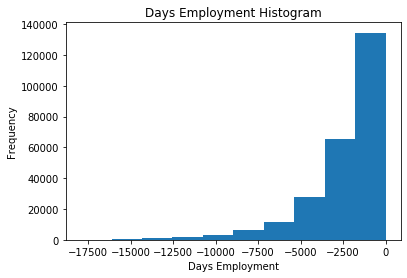

In [18]:
# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
print(app_train['DAYS_EMPLOYED_ANOM'].value_counts())

# 這邊我們用 nan 將異常值取代
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)  # 直接改變app_train dataframe

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');  # Series.plot.hist
plt.xlabel('Days Employment');

In [20]:
app_train[~app_train.OWN_CAR_AGE.isnull()]  # 找出非空值的

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,False
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,...,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,False
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
307497,456241,0,Cash loans,F,Y,Y,0,180000.0,270126.0,12028.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0,False


In [22]:
app_train[~app_train["OWN_CAR_AGE"].isnull()]  # 原來可以用pd.COLUMN_NAME

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,False
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
15,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,...,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,False
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
307497,456241,0,Cash loans,F,Y,Y,0,180000.0,270126.0,12028.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0,False


In [24]:
app_train[app_train["OWN_CAR_AGE"] == np.nan]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM


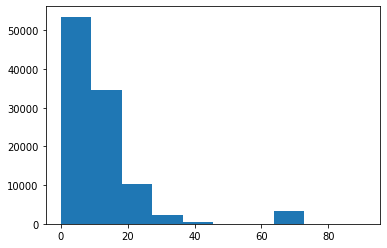

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
52.0       1
56.0       1
47.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [19]:
# 檢查 OWN_CAR_AGE: 貸款人的車齡
plt.hist(app_train[~app_train.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE'])  
plt.show()
app_train['OWN_CAR_AGE'].value_counts()

In [25]:
app_train[app_train['OWN_CAR_AGE'] > 50]['OWN_CAR_AGE'].value_counts()

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

### 從上面我們可以發現車齡為 64, 65 的人特別多，是否合理?
* 記得，這沒有正確答案 - 但我們總是可以給他們一些標記，讓最後的模型來決定

In [26]:
print("Target of OWN_CAR_AGE >= 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] >= 50 ]['TARGET'].mean() * 100 ))
print("Target of OWN_CAR_AGE < 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] < 50]['TARGET'].mean() * 100))

app_train['OWN_CAR_AGE_ANOM'] = app_train['OWN_CAR_AGE'] >= 50

Target of OWN_CAR_AGE >= 50: 8.36%
Target of OWN_CAR_AGE < 50: 7.21%
